In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
ps = PorterStemmer() 
def tokenization(line):
    tokenizer = RegexpTokenizer(r'\w+')
    new_line = tokenizer.tokenize(line)
    for count,token in enumerate(new_line):
        new_line[count] = lemmatizer.lemmatize(token.lower())        
    return ' '.join(new_line)

import data

In [3]:
path = 'quora_duplicate_questions.tsv'
import pandas as pd
quora = pd.read_csv(path, sep = '\t') #.dropna(axis=0)
quora.columns.values.tolist()

['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

In [5]:
len(list(quora.question2.tolist())),quora.qid2.tolist()[404289],quora.qid1.tolist()[404289]

(404290, 537933, 537932)

It can be found thet there are existing duplicated question for original question

In [4]:
dataaa = {}
for count,i in enumerate(quora.qid2.tolist()):
    dataaa[i] = []

In [16]:
len(list(dataaa.keys())),count

(299364, 404289)

select 10,000 for index

In [31]:
counter = 0
duplicate = []
corpus = {}
for count,i in enumerate(quora.is_duplicate.tolist()[0:100000]):
    corpus[quora.qid1.tolist()[count]] = quora.question1.tolist()[count]
    corpus[quora.qid2.tolist()[count]] = quora.question2.tolist()[count]

In [32]:
len(list(corpus.keys()))

165931

In [6]:
import pickle
pickle.dump(corpus,open('corpus.pickle','wb'))

NameError: name 'corpus' is not defined

Selec top 5000 question pair for experiments: data = {'qid':question}///

In [ ]:
len(quora.qid2.tolist())
data_all = {}
for count,q in enumerate(quora.qid1.tolist()):
    data_all[q] = quora.question1.tolist()[count]

In [ ]:
for count,q in enumerate(quora.qid2.tolist()):
    data_all[q] = quora.question2.tolist()[count]

Saving top 5000 pair/all pair

In [20]:
import pickle
data_5000 = data
len(list(data_5000.keys()))
pickle.dump(data_5000,open('quora_5000',"wb"))

Loading 5000 pairs

In [3]:
import pickle
all_pair = pickle.load(open('quora_5000',"rb"))
len(list(all_pair.keys()))

9859

finding 4000 duplictaed pairs ALL FROM HERE

In [7]:
counter = 0
duplicate = []
corpus_question = {}
for count,i in enumerate(quora.is_duplicate.tolist()[0:10760]):
    if i == 1:
        counter += 1
        corpus_question[quora.qid1.tolist()[count]] = quora.question1.tolist()[count]
        corpus_question[quora.qid2.tolist()[count]] = quora.question2.tolist()[count]
#         duplicate.append([quora.qid1.tolist()[count],quora.qid2.tolist()[count]])
        

KeyboardInterrupt: 

In [54]:
counter,count

(4000, 10759)

In [4]:
import pickle
# pickle.dump(corpus_question,open('corpus_question',"wb"))
corpus_question = pickle.load(open('corpus_question',"rb"))

In [3]:
import pickle
pickle.dump(duplicate,open('4000_duplicate_pair',"wb"))

NameError: name 'duplicate' is not defined

Collect question: selected_pair:{'qid1':qid2}

In [5]:
import pickle
duplicate = pickle.load(open('4000_duplicate_pair',"rb"))
# count = 0
# selected_pair = {}
# for i in duplicate:
#     selected_pair[i[0]] = i[1]
# print(len(list(selected_pair.keys())))
# selected_pair[15]
type(duplicate)

list

Delete repeated qid1

In [6]:
selected_1 = []
selected_2 = []
for i in duplicate:
    selected_1.append(i[0])
    selected_2.append(i[1])
len(selected_1)

4000

In [7]:
from collections import Counter
final_selected_pair = {}
repeated=[]
for count,i in enumerate(selected_1):
    if Counter(selected_1)[i]!=1:
#         print(i)
        repeated.append(i)
    else:
        final_selected_pair[i]=selected_2[count]
pickle.dump(final_selected_pair,open('final_selected_pair','wb'))
len(repeated),len(list(final_selected_pair.keys()))

(310, 3690)

In [8]:
len(list(final_selected_pair)),type(final_selected_pair)

(3690, dict)

final corpus question

In [9]:
import pickle
final_corpus_question = {}
for key,item in final_selected_pair.items():
    final_corpus_question[key]=corpus_question[key]
    final_corpus_question[item]=corpus_question[item]
len(list(final_corpus_question)),len(list(corpus_question))

(7152, 7526)

Preprocessing question: lowercase and stem

prepare for index: 

In [37]:
fw = open('corpus','w',encoding='utf-8') 
for key,item in corpus.items():
    fw.write('<DOC>' + '\n')
    fw.write('<DOCNO>' + str(key) + '</DOCNO>'+ '\n')
    fw.write('<TEXT>' + '\n')
    fw.write(tokenization(item))
    fw.write('</TEXT>' + '\n')
    fw.write('</DOC>' + '\n')
    

Generate Topic file. Using slected_pair[i][0]

In [224]:
fw = open('_'.join(('final','initial','topic')),'w',encoding='utf-8')
fw.write('<parameters>' + '\n')
fw.write('<index>' + '/ssd2/wanning/Indri/index/Quora_index' +'</index>'+ '\n')
fw.write('<count>11</count>' + '\n')
fw.write('<trecFormat>true</trecFormat>' + '\n')
for key,item in final_selected_pair.items():
    fw.write('<query>' + '\n')
    fw.write('<number>' + ' '+ str(key) + '</number>' + '\n')
    fw.write('<text>' + tokenization(final_corpus_question[key]) + '</text>' + '\n')
    fw.write('</query>'+ '\n')
fw.write('</parameters>')
fw.close()

split train/test/dev according to QID: 3038/400/400

In [8]:
import pickle
final_selected_pair = pickle.load(open('final_selected_pair','rb'))
train_id = list(final_selected_pair.keys())[0:3090]
dev_id = list(final_selected_pair.keys())[3090:3390]
test_id = list(final_selected_pair.keys())[3390:3690]
len(train_id)+len(dev_id)+len(test_id),len(train_id),len(dev_id),len(test_id)
pickle.dump(test_id,open('test_id','wb'))

test if there are diplicated Q

In [9]:
test = {}
for i in train_id:
    test[i]=[]
for i in dev_id:
    test[i]=[]
for i in test_id:
    test[i]=[]
dev_id

[17590,
 4977,
 17595,
 17604,
 17606,
 17608,
 17614,
 17621,
 17632,
 17634,
 17639,
 17647,
 17661,
 17663,
 17669,
 17675,
 17677,
 8034,
 17686,
 17688,
 17705,
 17712,
 17716,
 17728,
 17730,
 17732,
 17734,
 17738,
 17746,
 17754,
 17761,
 17770,
 17778,
 17789,
 10804,
 17803,
 17805,
 17809,
 17811,
 17819,
 17823,
 17824,
 17830,
 17832,
 17834,
 17842,
 17846,
 17855,
 17857,
 17867,
 17869,
 17883,
 17885,
 17886,
 17894,
 17897,
 17904,
 17910,
 17912,
 17914,
 17916,
 17918,
 17920,
 17943,
 17945,
 17947,
 17954,
 17958,
 17961,
 17965,
 17971,
 17979,
 17983,
 17991,
 17995,
 18005,
 18011,
 18015,
 18023,
 18029,
 18041,
 18043,
 7088,
 18048,
 18052,
 18066,
 18079,
 18092,
 18108,
 18111,
 18119,
 18121,
 18125,
 18135,
 18137,
 18141,
 18143,
 18147,
 18149,
 18157,
 18161,
 18163,
 18172,
 18175,
 18187,
 18197,
 18203,
 18205,
 18214,
 18218,
 18219,
 11032,
 18232,
 18242,
 18245,
 18251,
 18259,
 18269,
 2575,
 18274,
 18276,
 18281,
 5724,
 18285,
 18288,
 1830

Generate train/test/dev dataset by reading the initial runfile(to find corresponding negative sample)
Construct dataset

In [47]:
data = []
qid_rel = {}
with open('final_initial_run','r') as f:
    for count,line in enumerate(f):
        data.append(line)
        if count%11 == 0:
            qid_rel[line.strip().split(' ')[0]] = {}
            ### no qid itself ###
        qid_rel[line.strip().split(' ')[0]][str(final_selected_pair[int(line.strip().split(' ')[0])])] = 1
        if line.strip().split(' ')[0] != line.strip().split(' ')[2]:
                ### no positive qid ####
            if int(line.strip().split(' ')[2]) != final_selected_pair[int(line.strip().split(' ')[0])]:
                qid_rel[line.strip().split(' ')[0]][line.strip().split(' ')[2]] = 0
           

In [48]:
for count,i in enumerate(data[0:48]):
    if count%11 == 0:
        print(i.strip().split(' '))

['11', 'Q0', '11', '1', '247.636', 'indri']
['15', 'Q0', '15', '1', '58.641', 'indri']
['23', 'Q0', '23', '1', '77.673', 'indri']
['25', 'Q0', '25', '1', '73.6195', 'indri']
['27', 'Q0', '27', '1', '79.602', 'indri']


In [10]:
# len(list(qid_rel.keys())),qid_rel
import pickle
pickle.dump(qid_rel,open('qid_rel','wb'))

NameError: name 'qid_rel' is not defined

build train/dev/test topic file

In [11]:
# qid = dev_id + train_id
# name = 'train_dev'
qid = train_id + dev_id
name = 'train_dev'
fw = open('_'.join((name,'topic')),'w',encoding='utf-8')
fw.write('<parameters>' + '\n')
fw.write('<index>' + '/ssd2/wanning/Indri/index/Quora_index' +'</index>'+ '\n')
fw.write('<trecFormat>true</trecFormat>' + '\n')
for i in qid:
    fw.write('<query>' + '\n')
    fw.write('<number>' + str(i) + '</number>' + '\n')
    fw.write('<text>' + tokenization(final_corpus_question[i]) + '</text>' + '\n')
    for j in qid_rel[str(i)].keys():
        fw.write('<workingSetDocno>' + j + '</workingSetDocno>'+'\n')
    fw.write('</query>'+ '\n')
fw.write('</parameters>')
fw.close()

NameError: name 'final_corpus_question' is not defined

In [52]:
qid_rel[str(20820)]

{'19214': 1,
 '8968': 0,
 '19832': 0,
 '8002': 0,
 '7406': 0,
 '1500': 0,
 '9732': 0,
 '4538': 0,
 '7405': 0,
 '4539': 0}

In [116]:
final_corpus_question[20820],final_corpus_question[20821],final_corpus_question[6204],final_corpus_question[20417]

('Why do we stop growing after some age?',
 'Why do humans stop growing in height after a certain age?',
 'Does DNA change when growing up from baby to adult?',
 'Is muscle growth still possible after the age of 35?')

Build Qrels file

In [252]:
fw = open('_'.join(('quora','qrels')),'w',encoding='utf-8')
for qid in [train_id,test_id,dev_id]:
    for i in qid:
        for j in qid_rel[str(i)].keys():
            fw.write(str(i) + ' ' + '0' + ' ' + j + ' ' + str(qid_rel[str(i)][j]) + '\n')
fw.close()

Dataset Analysis: query length

In [12]:
from nltk.tokenize import RegexpTokenizer
def text_length(x):
    tokenizer = RegexpTokenizer(r'\w+')
    if x is None:
        return 0
    return len(tokenizer.tokenize(x))

Length of test set

In [15]:
import numpy as np
length = []
for item in test_id:
    length.append(text_length(final_corpus_question[item]))
print('average length is:{0}, st is:{1}'.format(np.mean(length),np.std(length)))
print('max length is:{0}, min length is:{1}'.format(max(length),min(length)))

average length is:10.146666666666667, st is:4.344171062725572
max length is:33, min length is:3


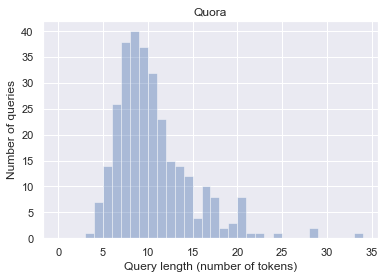

In [17]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(length,bins=[x for x in range(35)],axlabel='Query length (number of tokens)',kde=False)
plt.title('Quora')
# plt.xlabel('Delay (min)')
plt.ylabel('Number of queries')
plt.savefig("query_length_quora.png")

set number of length bin for query question. FOR TESTSET

In [22]:
import pickle
length_bin = {}
counter = 0
for i in range(5):
    length_bin[i+1] = []
for i in test_id:
#     print(text_length(final_corpus_question[i]))
    if text_length(final_corpus_question[i]) <= 5:
        length_bin[1].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 5 and text_length(final_corpus_question[i]) <= 10:
        length_bin[2].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 10 and text_length(final_corpus_question[i]) <= 15:
        length_bin[3].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 15 and text_length(final_corpus_question[i]) <= 20:
        length_bin[4].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 20:
        length_bin[5].append(i)
        counter += 1

pickle.dump(length_bin,open('length_bin',"wb"))

In [27]:
len(length_bin[1]) + len(length_bin[2]) +len(length_bin[3]) + len(length_bin[4]),len(length_bin[5])

(294, 6)

In [30]:
294/300

0.98

In [309]:
import pickle
pickle.dump(final_corpus_question,open('final_corpus_question','wb'))

In [29]:
import pickle
length_bin_new = {}
counter = 0
for i in range(9):
    length_bin[i+1] = []
for i in test_id:
#     print(text_length(final_corpus_question[i]))
    if text_length(final_corpus_question[i]) <= 5:
        length_bin[1].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 5 and text_length(final_corpus_question[i]) <= 8:
        length_bin[2].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 8 and text_length(final_corpus_question[i]) <= 10:
        length_bin[3].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 10 and text_length(final_corpus_question[i]) <= 12:
        length_bin[4].append(i)
        counter +=1 
        
    if text_length(final_corpus_question[i]) > 12 and text_length(final_corpus_question[i]) <= 14:
        length_bin[5].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 14 and text_length(final_corpus_question[i]) <= 16:
        length_bin[6].append(i)
        counter +=1 
        
    if text_length(final_corpus_question[i]) > 16 and text_length(final_corpus_question[i]) <= 18:
        length_bin[7].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 18 and text_length(final_corpus_question[i]) <= 20:
        length_bin[8].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 20:
        length_bin[9].append(i)
        counter += 1

pickle.dump(length_bin,open('length_bin_new',"wb"))

input: output.trecrun; output: standard runfile

In [65]:
fw = open('new_quora_output.trecrun','w')
with open('quora_output.trecrun','r') as f:
    for line in f:
#         print(line.split(' '))
        line = ' '.join((line.strip().split(' ')[0],line.strip().split(' ')[1],line.strip().split(' ')[2].split('=')[1],line.strip().split(' ')[3],line.strip().split(' ')[4],'indri'))
        print(line)
        fw.write(' ' + line + '\n')

19204 Q0 16372 1 2.57208 indri
19204 Q0 19205 2 1.87344 indri
19204 Q0 16373 3 -2.05009 indri
19204 Q0 4963 4 -4.50456 indri
19204 Q0 13677 5 -4.92919 indri
19204 Q0 6676 6 -5.28424 indri
19204 Q0 10965 7 -5.35562 indri
19204 Q0 13252 8 -5.38653 indri
19204 Q0 20700 9 -5.38653 indri
19204 Q0 4686 10 -5.42907 indri
19213 Q0 4538 1 -4.00831 indri
19213 Q0 4539 2 -4.00831 indri
19213 Q0 19214 3 -4.08623 indri
19213 Q0 8002 4 -4.10982 indri
19213 Q0 7406 5 -4.24082 indri
19213 Q0 9732 6 -4.39318 indri
19213 Q0 8968 7 -4.53105 indri
19213 Q0 19832 8 -4.57855 indri
19213 Q0 7405 9 -4.71643 indri
19213 Q0 1500 10 -4.98519 indri
19219 Q0 19220 1 3.33441 indri
19219 Q0 9402 2 1.79082 indri
19219 Q0 12169 3 1.40633 indri
19219 Q0 3463 4 1.19208 indri
19219 Q0 2513 5 1.19208 indri
19219 Q0 7306 6 1.19208 indri
19219 Q0 3464 7 1.19208 indri
19219 Q0 2512 8 1.19208 indri
19219 Q0 12170 9 1.19208 indri
19219 Q0 19770 10 1.05621 indri
19229 Q0 19230 1 0.33101 indri
19229 Q0 4661 2 -0.59081 indri
1922

18743 Q0 7681 4 3.19054 indri
18743 Q0 2502 5 3.00891 indri
18743 Q0 20514 6 2.90878 indri
18743 Q0 14887 7 2.75526 indri
18743 Q0 2503 8 2.7213 indri
18743 Q0 3480 9 1.04904 indri
18743 Q0 17904 10 0.53537 indri
20517 Q0 2501 1 2.13383 indri
20517 Q0 2500 2 1.45353 indri
20517 Q0 19920 3 0.74437 indri
20517 Q0 9511 4 0.59483 indri
20517 Q0 19921 5 0.57371 indri
20517 Q0 9512 6 0.44533 indri
20517 Q0 816 7 -0.08405 indri
20517 Q0 6705 8 -0.22584 indri
20517 Q0 8315 9 -0.24812 indri
20517 Q0 8314 10 -1.93359 indri
1259 Q0 18302 1 0.53048 indri
1259 Q0 7890 2 0.17103 indri
1259 Q0 11920 3 0.17103 indri
1259 Q0 18301 4 0.17103 indri
1259 Q0 7905 5 0.14159 indri
1259 Q0 7891 6 0.07132 indri
1259 Q0 11919 7 0.07132 indri
1259 Q0 20371 8 -0.01779 indri
1259 Q0 20372 9 -0.19177 indri
1259 Q0 753 10 -1.13066 indri
20527 Q0 20528 1 2.02844 indri
20527 Q0 20000 2 2.02844 indri
20527 Q0 19999 3 2.02844 indri
20527 Q0 13509 4 2.02844 indri
20527 Q0 13508 5 2.02844 indri
20527 Q0 18568 6 -2.80737 i

In [14]:
import pickle
final_corpus_question = pickle.load(open('final_corpus_question','rb'))
qid_rel = pickle.load(open('qid_rel','rb'))

In [5]:
for i in [11,12,17520,7968,17519,7641,20734,20733,8034,13405,9565]:
    print(final_corpus_question[i])

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
How real is astrology?
What does the Quran say about triple talaq?
Is astrology real or not?
Why should i believe in astrology?
How much should one believe in astrology and palmistry? Why?
Why should we believe in astrology or palmistry?
Did astronomers really visit moon?
Why does the earth revolve around the sun?
Is astrology true? Should we believe it or not?


In [2]:
qid_rel

{'11': {'12': 1,
  '17520': 0,
  '7968': 0,
  '17519': 0,
  '7641': 0,
  '20734': 0,
  '20733': 0,
  '8034': 0,
  '13405': 0,
  '9565': 0},
 '15': {'16': 1,
  '19273': 0,
  '4433': 0,
  '727': 0,
  '17834': 0,
  '3424': 0,
  '19804': 0,
  '9356': 0,
  '726': 0,
  '14333': 0},
 '23': {'24': 1,
  '1803': 0,
  '8899': 0,
  '6661': 0,
  '3805': 0,
  '4626': 0,
  '8898': 0,
  '1292': 0,
  '1127': 0,
  '9590': 0},
 '25': {'26': 1,
  '14035': 0,
  '14034': 0,
  '4416': 0,
  '1104': 0,
  '11670': 0,
  '5822': 0,
  '20491': 0,
  '11669': 0,
  '5821': 0},
 '27': {'28': 1,
  '5111': 0,
  '5110': 0,
  '19393': 0,
  '18711': 0,
  '19392': 0,
  '1087': 0,
  '16917': 0,
  '15067': 0,
  '19893': 0},
 '31': {'32': 1,
  '12544': 0,
  '6937': 0,
  '8577': 0,
  '9334': 0,
  '1101': 0,
  '8578': 0,
  '1100': 0,
  '11435': 0,
  '6079': 0},
 '33': {'34': 1,
  '11835': 0,
  '6986': 0,
  '3563': 0,
  '9693': 0,
  '17954': 0,
  '9694': 0,
  '3684': 0,
  '3564': 0,
  '3207': 0},
 '37': {'38': 1,
  '1357': 0,
  '

In [41]:
question[19229],question[19230],question[17151],question[4661],question[15836],question[4662]

('What movie have you watched that changed your life?',
 "What movie have you watched that made you think it's life changing?",
 'What is the best Bollywood movie you have watched?',
 'What is that one decision that changed your life forever?',
 'What was the best book that changed your life?',
 'What is one decision that changed your life forever?')

Prepare for matchzoo

In [101]:
def matchzoo(dataset,file_name):
    data = []
    headers = ['id_left','text_left','id_right','text_right','label']
    for count,item in enumerate(dataset):
        for key,itemm in qid_rel[str(item)].items():
            data_now = {}
            data_now['label'] = str(itemm)
            data_now['id_left'] = ''.join(('Q',str(item)))
            data_now['text_left'] = tokenization(final_corpus_question[int(item)])
            data_now['id_right'] = str(key)
            data_now['text_right'] = tokenization(final_corpus_question[int(key)])
            data.append(data_now)
#     print(data)
    with open(file_name,'w',encoding='utf-8') as f:
        f_csv = csv.DictWriter(f, headers)
        f_csv.writeheader()
        f_csv.writerows(data)

In [102]:
import csv
split = ['train','test','dev']
quora =[train_id,test_id,dev_id]
for count,item in enumerate(quora):
    file_name = '.'.join((split[count],'csv'))
#     print(type(item))
#     print(item.RELQ_RELEVANCE2ORGQ.tolist())
    matchzoo(item,file_name)

In [58]:
for key,item in qid_rel.items():
    print(key)
    print(item)
    for keyy,itemm in item.items():
        print(keyy)
#         print(itemm)

11
{'12': 1, '17520': 0, '7968': 0, '17519': 0, '7641': 0, '20734': 0, '20733': 0, '8034': 0, '13405': 0, '9565': 0}
12
17520
7968
17519
7641
20734
20733
8034
13405
9565
15
{'16': 1, '19273': 0, '4433': 0, '727': 0, '17834': 0, '3424': 0, '19804': 0, '9356': 0, '726': 0, '14333': 0}
16
19273
4433
727
17834
3424
19804
9356
726
14333
23
{'24': 1, '1803': 0, '8899': 0, '6661': 0, '3805': 0, '4626': 0, '8898': 0, '1292': 0, '1127': 0, '9590': 0}
24
1803
8899
6661
3805
4626
8898
1292
1127
9590
25
{'26': 1, '14035': 0, '14034': 0, '4416': 0, '1104': 0, '11670': 0, '5822': 0, '20491': 0, '11669': 0, '5821': 0}
26
14035
14034
4416
1104
11670
5822
20491
11669
5821
27
{'28': 1, '5111': 0, '5110': 0, '19393': 0, '18711': 0, '19392': 0, '1087': 0, '16917': 0, '15067': 0, '19893': 0}
28
5111
5110
19393
18711
19392
1087
16917
15067
19893
31
{'32': 1, '12544': 0, '6937': 0, '8577': 0, '9334': 0, '1101': 0, '8578': 0, '1100': 0, '11435': 0, '6079': 0}
32
12544
6937
8577
9334
1101
8578
1100
11435
6079


4898
9665
8690
11186
1270
{'1271': 1, '1553': 0, '19831': 0, '4884': 0, '1554': 0, '4883': 0, '16001': 0, '18259': 0, '3658': 0, '18739': 0}
1271
1553
19831
4884
1554
4883
16001
18259
3658
18739
1272
{'1273': 1, '8673': 0, '8674': 0, '12174': 0, '3314': 0, '3899': 0, '876': 0, '20529': 0, '18849': 0, '3898': 0}
1273
8673
8674
12174
3314
3899
876
20529
18849
3898
1280
{'1281': 1, '407': 0, '13916': 0, '13286': 0, '13285': 0, '1410': 0, '1411': 0, '1830': 0, '785': 0, '784': 0}
1281
407
13916
13286
13285
1410
1411
1830
785
784
1286
{'1287': 1, '2323': 0, '11396': 0, '3939': 0, '16490': 0, '14826': 0, '1152': 0, '6749': 0, '11588': 0, '2439': 0}
1287
2323
11396
3939
16490
14826
1152
6749
11588
2439
1292
{'1127': 1, '1126': 0, '8899': 0, '2371': 0, '568': 0, '8898': 0, '6929': 0, '14119': 0, '569': 0, '8037': 0}
1127
1126
8899
2371
568
8898
6929
14119
569
8037
1293
{'1294': 1, '7568': 0, '7569': 0, '11888': 0, '17071': 0, '4477': 0, '17070': 0, '13206': 0, '9946': 0, '16584': 0}
1294
7568


17491
10945
18569
17490
10944
2300
{'2301': 1, '13463': 0, '14317': 0, '6999': 0, '13907': 0, '15445': 0, '12540': 0, '11770': 0, '3299': 0, '9731': 0}
2301
13463
14317
6999
13907
15445
12540
11770
3299
9731
2304
{'2305': 1, '17622': 0, '18892': 0, '11091': 0, '9899': 0, '10158': 0, '5171': 0, '10809': 0, '11257': 0, '10810': 0}
2305
17622
18892
11091
9899
10158
5171
10809
11257
10810
2306
{'2307': 1, '13582': 0, '15920': 0, '13354': 0, '16052': 0, '13581': 0, '18380': 0, '12966': 0, '12967': 0, '15919': 0}
2307
13582
15920
13354
16052
13581
18380
12966
12967
15919
2308
{'2309': 1, '17670': 0, '16054': 0, '705': 0, '16055': 0, '20552': 0, '15832': 0, '14006': 0, '12839': 0, '8241': 0}
2309
17670
16054
705
16055
20552
15832
14006
12839
8241
2320
{'2321': 1, '17734': 0, '2803': 0, '11757': 0, '4102': 0, '4101': 0, '17735': 0, '18147': 0, '4627': 0, '657': 0}
2321
17734
2803
11757
4102
4101
17735
18147
4627
657
2324
{'2325': 1, '8643': 0, '16434': 0, '18682': 0, '10939': 0, '19728': 0, '1

15140
14288
10721
3790
{'3791': 1, '1202': 0, '8828': 0, '1203': 0, '17979': 0, '15344': 0, '19732': 0, '2420': 0, '8829': 0, '19290': 0}
3791
1202
8828
1203
17979
15344
19732
2420
8829
19290
3792
{'3793': 1, '7749': 0, '7750': 0, '4151': 0, '5057': 0, '15296': 0, '15297': 0, '8690': 0, '2756': 0, '5058': 0}
3793
7749
7750
4151
5057
15296
15297
8690
2756
5058
3794
{'3795': 1, '16780': 0, '11091': 0, '9899': 0, '9037': 0, '9036': 0, '15987': 0, '14926': 0, '17456': 0, '11264': 0, '5358': 0}
3795
16780
11091
9899
9037
9036
15987
14926
17456
11264
5358
3796
{'3797': 1, '19148': 0, '19149': 0, '2234': 0, '2235': 0, '8360': 0, '20155': 0, '18417': 0, '10614': 0, '19985': 0}
3797
19148
19149
2234
2235
8360
20155
18417
10614
19985
3800
{'3801': 1, '11811': 0, '11812': 0, '14420': 0, '11991': 0, '14419': 0, '3961': 0, '3962': 0, '9909': 0, '1052': 0}
3801
11811
11812
14420
11991
14419
3961
3962
9909
1052
3802
{'3803': 1, '20007': 0, '20006': 0, '2119': 0, '2118': 0, '17121': 0, '15280': 0, '15

15337
17408
11646
11645
13493
5196
{'5197': 1, '11653': 0, '1474': 0, '1473': 0, '6073': 0, '18865': 0, '18417': 0, '1882': 0, '7178': 0, '11490': 0}
5197
11653
1474
1473
6073
18865
18417
1882
7178
11490
5204
{'5205': 1, '4029': 0, '4484': 0, '17573': 0, '17574': 0, '6148': 0, '6147': 0, '7117': 0, '10350': 0, '1806': 0}
5205
4029
4484
17573
17574
6148
6147
7117
10350
1806
5206
{'5207': 1, '6504': 0, '10617': 0, '6505': 0, '8454': 0, '16486': 0, '8849': 0, '8848': 0, '17341': 0, '15440': 0}
5207
6504
10617
6505
8454
16486
8849
8848
17341
15440
5208
{'5209': 1, '13008': 0, '11386': 0, '18847': 0, '753': 0, '752': 0, '11387': 0, '13007': 0, '3275': 0, '3276': 0}
5209
13008
11386
18847
753
752
11387
13007
3275
3276
5216
{'5217': 1, '19009': 0, '19008': 0, '360': 0, '17351': 0, '17352': 0, '3112': 0, '20605': 0, '3111': 0, '6486': 0}
5217
19009
19008
360
17351
17352
3112
20605
3111
6486
5222
{'5223': 1, '13284': 0, '5263': 0, '13283': 0, '16978': 0, '18976': 0, '18975': 0, '20640': 0, '123

6460
{'6461': 1, '2342': 0, '2343': 0, '3775': 0, '59': 0, '3774': 0, '1479': 0, '60': 0, '17550': 0, '17549': 0}
6461
2342
2343
3775
59
3774
1479
60
17550
17549
6464
{'6465': 1, '4780': 0, '17190': 0, '5479': 0, '5480': 0, '11194': 0, '14774': 0, '12774': 0, '11653': 0, '5021': 0}
6465
4780
17190
5479
5480
11194
14774
12774
11653
5021
6472
{'6473': 1, '5746': 0, '2109': 0, '5429': 0, '5430': 0, '919': 0, '14227': 0, '19547': 0, '2108': 0, '13238': 0}
6473
5746
2109
5429
5430
919
14227
19547
2108
13238
6474
{'6475': 1, '5091': 0, '5090': 0, '13946': 0, '13945': 0, '16613': 0, '8993': 0, '8992': 0, '389': 0, '2996': 0}
6475
5091
5090
13946
13945
16613
8993
8992
389
2996
6476
{'6477': 1, '4604': 0, '5430': 0, '512': 0, '4603': 0, '20708': 0, '19813': 0, '18765': 0, '13744': 0, '6014': 0}
6477
4604
5430
512
4603
20708
19813
18765
13744
6014
6478
{'6479': 1, '14454': 0, '14615': 0, '14614': 0, '15718': 0, '15717': 0, '12214': 0, '18136': 0, '18135': 0, '789': 0}
6479
14454
14615
14614
1571

{'7752': 1, '11435': 0, '10693': 0, '6079': 0, '2809': 0, '12544': 0, '3397': 0, '10217': 0, '8578': 0, '15733': 0}
7752
11435
10693
6079
2809
12544
3397
10217
8578
15733
7753
{'7754': 1, '18758': 0, '4018': 0, '14997': 0, '20601': 0, '19076': 0, '2920': 0, '7530': 0, '19308': 0, '400': 0, '19264': 0}
7754
18758
4018
14997
20601
19076
2920
7530
19308
400
19264
7759
{'7760': 1, '17299': 0, '3177': 0, '18757': 0, '16642': 0, '2309': 0, '9426': 0, '3724': 0, '16174': 0, '6058': 0}
7760
17299
3177
18757
16642
2309
9426
3724
16174
6058
7765
{'7766': 1, '11147': 0, '5672': 0, '11148': 0, '7324': 0, '7026': 0, '7025': 0, '9245': 0, '9246': 0, '7325': 0}
7766
11147
5672
11148
7324
7026
7025
9245
9246
7325
7771
{'7772': 1, '20508': 0, '20507': 0, '5228': 0, '17576': 0, '17575': 0, '5229': 0, '7382': 0, '8243': 0, '3723': 0}
7772
20508
20507
5228
17576
17575
5229
7382
8243
3723
7788
{'7789': 1, '474': 0, '9463': 0, '18364': 0, '20073': 0, '16924': 0, '1708': 0, '14182': 0, '3028': 0, '11427': 0}

20285
9115
7488
8931
{'8932': 1, '13959': 0, '10211': 0, '17833': 0, '17958': 0, '3776': 0, '17316': 0, '16358': 0, '18006': 0, '17295': 0}
8932
13959
10211
17833
17958
3776
17316
16358
18006
17295
8937
{'8938': 1, '14557': 0, '5936': 0, '20666': 0, '5935': 0, '13205': 0, '7257': 0, '3390': 0, '3389': 0, '7258': 0}
8938
14557
5936
20666
5935
13205
7257
3390
3389
7258
8947
{'8948': 1, '5516': 0, '5515': 0, '18773': 0, '7077': 0, '4785': 0, '3047': 0, '7413': 0, '4784': 0, '17870': 0}
8948
5516
5515
18773
7077
4785
3047
7413
4784
17870
8949
{'8950': 1, '4656': 0, '2650': 0, '1755': 0, '2651': 0, '16642': 0, '9426': 0, '3724': 0, '6058': 0, '10865': 0}
8950
4656
2650
1755
2651
16642
9426
3724
6058
10865
8955
{'8956': 1, '17948': 0, '17947': 0, '16107': 0, '3410': 0, '12844': 0, '3791': 0, '133': 0, '3896': 0, '19966': 0}
8956
17948
17947
16107
3410
12844
3791
133
3896
19966
8963
{'8964': 1, '17591': 0, '12531': 0, '12995': 0, '15510': 0, '12994': 0, '20216': 0, '1722': 0, '8259': 0, '8258

18049
19610
19611
18701
5559
10395
{'10396': 1, '7439': 0, '7440': 0, '10125': 0, '17483': 0, '6823': 0, '6824': 0, '4869': 0, '4870': 0, '10126': 0}
10396
7439
7440
10125
17483
6823
6824
4869
4870
10126
10397
{'10398': 1, '10710': 0, '17227': 0, '2273': 0, '9307': 0, '6482': 0, '18576': 0, '8458': 0, '18577': 0, '10711': 0}
10398
10710
17227
2273
9307
6482
18576
8458
18577
10711
10405
{'10406': 1, '10052': 0, '9420': 0, '5637': 0, '9027': 0, '9026': 0, '7525': 0, '4629': 0, '7526': 0, '10803': 0}
10406
10052
9420
5637
9027
9026
7525
4629
7526
10803
10411
{'10412': 1, '16863': 0, '17717': 0, '8919': 0, '19046': 0, '16864': 0, '6074': 0, '6073': 0, '19626': 0, '8920': 0}
10412
16863
17717
8919
19046
16864
6074
6073
19626
8920
10415
{'10416': 1, '19047': 0, '20148': 0, '3594': 0, '7258': 0, '379': 0, '3593': 0, '7682': 0, '2502': 0, '20147': 0}
10416
19047
20148
3594
7258
379
3593
7682
2502
20147
10434
{'10435': 1, '14977': 0, '14976': 0, '2026': 0, '18482': 0, '9596': 0, '18420': 0, '20

18588
10907
11881
{'11882': 1, '13880': 0, '11168': 0, '4264': 0, '3829': 0, '9983': 0, '643': 0, '7529': 0, '14313': 0, '12929': 0}
11882
13880
11168
4264
3829
9983
643
7529
14313
12929
11887
{'11888': 1, '12131': 0, '12726': 0, '12132': 0, '1448': 0, '5279': 0, '5425': 0, '4816': 0, '5278': 0, '4817': 0}
11888
12131
12726
12132
1448
5279
5425
4816
5278
4817
11889
{'11890': 1, '8386': 0, '9958': 0, '9959': 0, '1170': 0, '11626': 0, '4188': 0, '383': 0, '4179': 0, '4187': 0}
11890
8386
9958
9959
1170
11626
4188
383
4179
4187
11905
{'11906': 1, '15279': 0, '17263': 0, '17262': 0, '16568': 0, '17147': 0, '16569': 0, '1675': 0, '1676': 0, '17148': 0}
11906
15279
17263
17262
16568
17147
16569
1675
1676
17148
11907
{'11908': 1, '15673': 0, '15674': 0, '12465': 0, '16390': 0, '4122': 0, '10487': 0, '4121': 0, '17002': 0, '16176': 0}
11908
15673
15674
12465
16390
4122
10487
4121
17002
16176
11919
{'11920': 1, '7890': 0, '7905': 0, '7891': 0, '20371': 0, '20372': 0, '1259': 0, '18301': 0, '183

8395
13199
{'6130': 1, '6129': 0, '17605': 0, '17604': 0, '2630': 0, '4837': 0, '2631': 0, '10386': 0, '11982': 0, '16924': 0}
6130
6129
17605
17604
2630
4837
2631
10386
11982
16924
13204
{'13205': 1, '9488': 0, '9487': 0, '15606': 0, '12492': 0, '18574': 0, '19457': 0, '4358': 0, '1802': 0, '10991': 0}
13205
9488
9487
15606
12492
18574
19457
4358
1802
10991
13206
{'13207': 1, '10346': 0, '10345': 0, '12353': 0, '20398': 0, '9008': 0, '9009': 0, '12354': 0, '9946': 0, '16584': 0}
13207
10346
10345
12353
20398
9008
9009
12354
9946
16584
13216
{'4367': 1, '14931': 0, '6312': 0, '19076': 0, '7754': 0, '6274': 0, '14998': 0, '20190': 0, '6721': 0, '19264': 0}
4367
14931
6312
19076
7754
6274
14998
20190
6721
19264
13219
{'13220': 1, '12081': 0, '12080': 0, '7383': 0, '1668': 0, '5699': 0, '8899': 0, '8898': 0, '18785': 0, '7076': 0}
13220
12081
12080
7383
1668
5699
8899
8898
18785
7076
13221
{'13222': 1, '19245': 0, '15386': 0, '20425': 0, '18431': 0, '18430': 0, '11691': 0, '15387': 0, '20

14755
{'14756': 1, '9257': 0, '3574': 0, '20325': 0, '4689': 0, '3573': 0, '4872': 0, '13237': 0, '20324': 0, '13136': 0}
14756
9257
3574
20325
4689
3573
4872
13237
20324
13136
14757
{'14758': 1, '15988': 0, '7608': 0, '9736': 0, '1666': 0, '16319': 0, '9737': 0, '18846': 0, '1665': 0, '18847': 0}
14758
15988
7608
9736
1666
16319
9737
18846
1665
18847
5123
{'14767': 1, '10249': 0, '9661': 0, '525': 0, '12304': 0, '15766': 0, '6481': 0, '9662': 0, '6480': 0, '526': 0, '15767': 0}
14767
10249
9661
525
12304
15766
6481
9662
6480
526
15767
14773
{'14774': 1, '12774': 0, '11654': 0, '11653': 0, '6465': 0, '16530': 0, '3460': 0, '6464': 0, '9488': 0, '12151': 0}
14774
12774
11654
11653
6465
16530
3460
6464
9488
12151
14775
{'14776': 1, '7861': 0, '13323': 0, '319': 0, '17992': 0, '4329': 0, '17825': 0, '19943': 0, '6823': 0, '4980': 0}
14776
7861
13323
319
17992
4329
17825
19943
6823
4980
14781
{'14782': 1, '11827': 0, '1506': 0, '3692': 0, '1505': 0, '13083': 0, '3691': 0, '10058': 0, '1005

16434
{'12957': 1, '1791': 0, '1792': 0, '12956': 0, '20394': 0, '17867': 0, '13807': 0, '12523': 0, '4047': 0, '2072': 0}
12957
1791
1792
12956
20394
17867
13807
12523
4047
2072
16438
{'16439': 1, '170': 0, '9555': 0, '7395': 0, '7396': 0, '169': 0, '478': 0, '6385': 0, '615': 0, '3616': 0}
16439
170
9555
7395
7396
169
478
6385
615
3616
16442
{'16443': 1, '4379': 0, '4380': 0, '18613': 0, '11442': 0, '131': 0, '19349': 0, '5010': 0, '1808': 0, '4734': 0}
16443
4379
4380
18613
11442
131
19349
5010
1808
4734
16448
{'16449': 1, '8351': 0, '8350': 0, '16088': 0, '16087': 0, '17592': 0, '8694': 0, '3808': 0, '5652': 0, '1318': 0}
16449
8351
8350
16088
16087
17592
8694
3808
5652
1318
16454
{'16455': 1, '1232': 0, '5292': 0, '77': 0, '13547': 0, '5291': 0, '20624': 0, '1233': 0, '12397': 0, '9862': 0}
16455
1232
5292
77
13547
5291
20624
1233
12397
9862
16456
{'16457': 1, '2917': 0, '5408': 0, '16416': 0, '2916': 0, '5407': 0, '16417': 0, '14338': 0, '14339': 0, '12776': 0}
16457
2917
5408
16

8660
4751
9030
899
18469
12649
17632
{'17633': 1, '9396': 0, '4039': 0, '14931': 0, '9343': 0, '9395': 0, '9768': 0, '7188': 0, '4040': 0, '19307': 0}
17633
9396
4039
14931
9343
9395
9768
7188
4040
19307
17634
{'17635': 1, '18365': 0, '17968': 0, '13090': 0, '13091': 0, '19979': 0, '13241': 0, '13240': 0, '1650': 0, '3826': 0}
17635
18365
17968
13090
13091
19979
13241
13240
1650
3826
17639
{'17640': 1, '19824': 0, '19823': 0, '10826': 0, '15938': 0, '19985': 0, '10981': 0, '147': 0, '7222': 0, '1706': 0}
17640
19824
19823
10826
15938
19985
10981
147
7222
1706
17647
{'17648': 1, '16490': 0, '2323': 0, '1286': 0, '19349': 0, '3939': 0, '2532': 0, '9456': 0, '19309': 0, '16709': 0}
17648
16490
2323
1286
19349
3939
2532
9456
19309
16709
17661
{'17662': 1, '15062': 0, '15063': 0, '9415': 0, '4836': 0, '4835': 0, '16016': 0, '10567': 0, '174': 0, '173': 0}
17662
15062
15063
9415
4836
4835
16016
10567
174
173
17663
{'17664': 1, '16823': 0, '16824': 0, '11069': 0, '7708': 0, '11234': 0, '13898

{'18870': 1, '4325': 0, '4326': 0, '9353': 0, '9354': 0, '7187': 0, '7186': 0, '5227': 0, '14218': 0, '14217': 0}
18870
4325
4326
9353
9354
7187
7186
5227
14218
14217
1318
{'18877': 1, '3807': 0, '1317': 0, '8694': 0, '3808': 0, '6110': 0, '8425': 0, '7285': 0, '7286': 0, '8695': 0}
18877
3807
1317
8694
3808
6110
8425
7285
7286
8695
18892
{'18893': 1, '2304': 0, '2305': 0, '6930': 0, '2561': 0, '17532': 0, '20201': 0, '12029': 0, '4416': 0, '12028': 0, '13144': 0}
18893
2304
2305
6930
2561
17532
20201
12029
4416
12028
13144
18913
{'18914': 1, '6994': 0, '6995': 0, '14960': 0, '19498': 0, '3047': 0, '14959': 0, '19499': 0, '3048': 0, '3138': 0}
18914
6994
6995
14960
19498
3047
14959
19499
3048
3138
18915
{'18916': 1, '6849': 0, '1781': 0, '3211': 0, '3210': 0, '6848': 0, '15141': 0, '10200': 0, '1401': 0, '1782': 0}
18916
6849
1781
3211
3210
6848
15141
10200
1401
1782
18917
{'18918': 1, '2861': 0, '2860': 0, '20203': 0, '967': 0, '3785': 0, '10721': 0, '1718': 0, '10720': 0, '11796': 0,

4641
2005
17160
20121
{'6273': 1, '590': 0, '6272': 0, '591': 0, '6274': 0, '400': 0, '11881': 0, '643': 0, '642': 0, '3544': 0}
6273
590
6272
591
6274
400
11881
643
642
3544
20122
{'20123': 1, '10816': 0, '10815': 0, '7324': 0, '16781': 0, '17966': 0, '7548': 0, '5390': 0, '5792': 0, '7026': 0}
20123
10816
10815
7324
16781
17966
7548
5390
5792
7026
20126
{'20127': 1, '7903': 0, '5556': 0, '7976': 0, '7975': 0, '5555': 0, '13690': 0, '17109': 0, '15414': 0, '14412': 0}
20127
7903
5556
7976
7975
5555
13690
17109
15414
14412
20128
{'4951': 1, '12638': 0, '14104': 0, '38': 0, '2375': 0, '4950': 0, '12639': 0, '18629': 0, '4412': 0, '15920': 0}
4951
12638
14104
38
2375
4950
12639
18629
4412
15920
6741
{'20129': 1, '18482': 0, '13325': 0, '1904': 0, '19734': 0, '6079': 0, '4963': 0, '9597': 0, '6740': 0, '4211': 0}
20129
18482
13325
1904
19734
6079
4963
9597
6740
4211
20135
{'20136': 1, '17476': 0, '9789': 0, '18053': 0, '8428': 0, '9790': 0, '9634': 0, '2921': 0, '5510': 0, '4264': 0}
2013

In [104]:
data = pd.read_csv('test.csv', sep=',')
qid = data.id_left.tolist()